<a href="https://colab.research.google.com/github/cfonderson/portfolio/blob/main/DS4A%20Capstone/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS4A CAPSTONE PROJECT: EXPLORATORY DATA ANALYSIS 
__Team Members: Cynthia Fonderson, Gabriel Briones, Solomon Berhe, Moradeke Adeniji-Somefun__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change view settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Summary

### Review of the data ingestion and cleaning steps
__Data Ingestion__<br>
To generate our full dataset, we gathered pregnancy-related mortality data from the CDC Wonder database and socioeconomic data from the U.S. census database. Seven factors were taken into consideration - namely, marital status, educational attainment, fertility, citizenship, income, access to health insurance and poverty rate. Both datasets were grouped by state and race.

__Data Cleaning__<br>
<u>Mortality data</u>: Suppressed and unreliable values in the mortality dataset were converted to NaN values.
<u>Socioeconomic data</u>: Unrecorded values (negative values) were converted to NaN values, and actual population numbers were calculated from percentages. The data was then averaged over the five year period to be consistent with the mortality data.

Following data cleaning, the socioeconomic and mortality datasets were merged on `state` and `race`.


### Exploratory data analysis
__Data Quality__<br>
Since we are aware of the presence of NaN values in our data, it was imperative we look at how much missing data we actually have. Upon inspection, 70 rows (~30% of our dataset) has NaN values across all the columns. Consequently, these records were dropped to avoid introducing bias/skew to our analyes.

__Univariate Analyses__<br>
To understand the spread of our data, univariate analyses were conducted on each variable i.e., deaths, marital status, educational attainment, fertility, citizenship, access to health insurance, income and poverty rate. Interesting insights from univariate EDA:
- The mortality data is right skewed, indicating that, on average, only a few women die of pregnancy-related causes in the United States
- On average, most women are either married or have never been married. Nevertheless, a good chunk of the female population is some form of separation (divorced, separated, widowed)
- The majority of women in the US have at least a high school diploma, but only a third of the female population have attained higher education
- On average, approxiamtely 2/3 of females give birth within marriage, while 1/3 of mothers in the US are unmarried
- Approximately 90%  of the female population is native born, while ~10% foreign-born, and are evenly split between naturalized citizens and immigrants
- In general, ~95% of the female population is employed
- Most women (~60%) in the US are privately insured, only ~10% of women do not have access to healthcare coverage
- Single women and single mothers make less income than married women. The poverty rates for unmarried women is also higher than that of married women, regardless of dependents

__Bivariate Analyses__<br>
To get insights into the racial differences across the variables considered, bivariate analyses were conducted. Key insights include:
- Black women die of pregnancy-related causes more frequently than any other race. Our mortality data on Asian/Pacific Islander and American Indian/Alaskan races may be insufficient to make significant conclusions based on race
- On average, Asian women and White women tend to be married, while majority of American Indian and Black women have never been married
- Overall, women across all race categories seem to be similarly educated, but Asians lead the charge for higher education, with ~40% of Asian women attaining higher education
- Most Asian and White women give birth within marriage (75-85%), while most American Indian and Black women (~60%) get in the family way outside of marriage
- Most American Indian, Black and White women in the US are native to the country (~95%), while the Asian female population is somewhat evenly distributed between native citizens, foreign-born citizens and foreign-born immigrants
- Women are similarly employed across all races, with employement rates > 85%
-  Most Asian and White women are privately insured (~75%), while only 50% of Black women have access to private healthcare insurance. Approximately 10% of Asian, Black and White women are unisured, but over 20% of American Indian women don't have healthcare insurance
- On average, Black women are low income, regardless of relationship status. White women are distributed in the low income and middle income categories, but women do not make high incomes across all races. There seems to be missing information on Asian and American Indian races, indicating we may have to drop these from our analyses

Since the bivariate analysis on the mortality and socioeconomic factors reveal discrepancies in data availability across the racial categories, we want to see how much data we have by race and state (as we are considering grouping our data even further by location). A high degree of variance was observed in the death rates across the different states, and little to no data was available for Asian and American Indian females in most states. Conseqently, moving forward, we will have to draw the line at comparing only Black and White female poppulations in the US.

__Correlation Analyses__<br>
Correlation analyses on the full datasets suggests differences between socioeconomic factors for Black and White women in the USA.

## Conclusions

This notebook was used to conduct exploratory data analysis on mortality and socioeconomic data for select female populations in the US. In general, differences could be observed in the pregnancy-related death rate, marital status, access to health care and income of Black and White female populations. On the other hand, missing information for the American Indian and Asian populations make comparison against these categories infeasible. Therefore, moving forward, we will only consider the Black and White populations for our analysis.

In [ ]:
df = pd.read_csv('full_data.csv')
df.head()

,state,race,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
0,Alabama,American Indian or Alaska Native,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
1,Alabama,Asian or Pacific Islander,NaN,NaN,NaN,14966,1241,1492,222,5382,30357,16860,0,0,7407,11827,9618,6117,261,44508.0,82042.5,41543.33,21321,4844,2756,7.80,8.72,16.08,14.90
2,Alabama,Black or African American,124.0,1.5,1.6,146082,52971,78583,25347,262990,709623,170979,5364,14404,689218,3093,3307,167061,16471,30560.0,41421.2,36678.00,354857,296495,73927,7.54,9.22,38.98,50.12
3,Alabama,White,137.0,0.7,0.8,745617,159696,188400,27845,298651,2077282,647510,26329,10057,1657752,15132,20418,334003,16387,38105.4,69768.2,46528.80,1223168,575669,141658,4.80,6.70,27.80,39.08
4,Alaska,American Indian or Alaska Native,10.0,NaN,NaN,14107,2965,4743,1448,17039,50817,5813,734,1298,54243,93,0,10491,1870,41640.4,54406.6,36256.80,16935,27497,14343,11.40,16.02,29.84,36.00


## Data Quality

In [ ]:
# Checking for null values

df.isna().sum()

state                  0
race                   0
deaths               104
crude_rate           128
age_adj_rate         128
married                0
widowed                0
divorced               0
separated              0
never_mar              0
hs_diploma             0
higher_ed              0
fertile_marr           0
fertile_unma           0
us_native              0
foreign_cit            0
foreign_imm            0
employed               0
unemployed             0
single_inc            69
marr_fam_inc          69
unma_fam_inc          69
insured_priv           0
insured_publ           0
insured_none           0
poverty_marr          69
poverty_marr_kids     69
poverty_unma          69
poverty_unma_kids     70
dtype: int64

In [ ]:
# Examining rows with null values

df[df.isna().any(axis=1)]

,state,race,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
0,Alabama,American Indian or Alaska Native,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
1,Alabama,Asian or Pacific Islander,NaN,NaN,NaN,14966,1241,1492,222,5382,30357,16860,0,0,7407,11827,9618,6117,261,44508.0,82042.5,41543.33,21321,4844,2756,7.80,8.72,16.08,14.90
4,Alaska,American Indian or Alaska Native,10.0,NaN,NaN,14107,2965,4743,1448,17039,50817,5813,734,1298,54243,93,0,10491,1870,41640.4,54406.6,36256.80,16935,27497,14343,11.40,16.02,29.84,36.00
5,Alaska,Asian or Pacific Islander,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
6,Alaska,Black or African American,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
7,Alaska,White,NaN,NaN,NaN,99149,10524,24785,2776,45662,321230,131277,4884,1117,213887,5422,3535,68554,3405,51698.6,98889.4,70169.60,176946,66578,22922,2.26,2.68,15.76,22.86
9,Arizona,Asian or Pacific Islander,NaN,NaN,NaN,62929,7157,7801,1518,24976,138633,84176,2319,384,35842,50418,36474,32257,1408,49873.4,92835.4,72011.20,91937,25572,7869,5.40,5.58,22.64,27.44
12,Arkansas,American Indian or Alaska Native,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
13,Arkansas,Asian or Pacific Islander,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
16,California,American Indian or Alaska Native,NaN,NaN,NaN,46189,9158,17604,4245,44892,155198,31670,1735,2021,129083,9069,12366,32150,3392,39195.2,60840.0,48304.60,76236,71160,17713,8.46,12.90,29.68,41.46


Since the NaN values occured in records that had no recorded mortality rate data, and they make up a considerable percentage of our dataset (30%), we decided to drop the NaN values to prevent them from skewing our data.

In [ ]:
# Dealing with null values

df.dropna(inplace=True)
df.shape

(76, 29)

In [ ]:
# Checking variable dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 2 to 203
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              76 non-null     object 
 1   race               76 non-null     object 
 2   deaths             76 non-null     float64
 3   crude_rate         76 non-null     float64
 4   age_adj_rate       76 non-null     float64
 5   married            76 non-null     int64  
 6   widowed            76 non-null     int64  
 7   divorced           76 non-null     int64  
 8   separated          76 non-null     int64  
 9   never_mar          76 non-null     int64  
 10  hs_diploma         76 non-null     int64  
 11  higher_ed          76 non-null     int64  
 12  fertile_marr       76 non-null     int64  
 13  fertile_unma       76 non-null     int64  
 14  us_native          76 non-null     int64  
 15  foreign_cit        76 non-null     int64  
 16  foreign_imm        76 non-n

So far so good! Our data is cleaned and ready for EDA.

## Exploratory Data Analysis

In [ ]:
df.head()

,state,race,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
2,Alabama,Black or African American,124.0,1.5,1.6,146082,52971,78583,25347,262990,709623,170979,5364,14404,689218,3093,3307,167061,16471,30560.0,41421.2,36678.0,354857,296495,73927,7.54,9.22,38.98,50.12
3,Alabama,White,137.0,0.7,0.8,745617,159696,188400,27845,298651,2077282,647510,26329,10057,1657752,15132,20418,334003,16387,38105.4,69768.2,46528.8,1223168,575669,141658,4.80,6.70,27.80,39.08
8,Arizona,American Indian or Alaska Native,31.0,1.3,1.2,36355,9423,12806,3333,62179,146993,22289,1484,3363,160016,1425,1585,30090,4042,32635.8,40233.4,33519.0,53231,79502,35641,17.12,21.42,39.48,46.32
10,Arizona,Black or African American,33.0,1.3,1.3,35056,6773,18201,3833,55827,176647,51117,2117,2444,137551,8739,7737,45483,4537,36865.8,54500.8,43435.4,90024,65730,14892,9.94,12.88,27.38,34.32
11,Arizona,White,176.0,0.5,0.6,1092101,204954,330306,39614,612577,3404464,1152408,41115,21366,2448537,133889,167463,607054,33486,40699.6,70414.4,51233.0,1805027,1083723,258319,5.44,8.24,24.10,33.34


In [ ]:
df.shape

(76, 29)

In [ ]:
df.columns

Index(['state', 'race', 'deaths', 'crude_rate', 'age_adj_rate', 'married',
       'widowed', 'divorced', 'separated', 'never_mar', 'hs_diploma',
       'higher_ed', 'fertile_marr', 'fertile_unma', 'us_native', 'foreign_cit',
       'foreign_imm', 'employed', 'unemployed', 'single_inc', 'marr_fam_inc',
       'unma_fam_inc', 'insured_priv', 'insured_publ', 'insured_none',
       'poverty_marr', 'poverty_marr_kids', 'poverty_unma',
       'poverty_unma_kids'],
      dtype='object')

In [ ]:
df.nunique(axis=0)

state                46
race                  4
deaths               63
crude_rate           18
age_adj_rate         17
married              76
widowed              76
divorced             76
separated            76
never_mar            76
hs_diploma           76
higher_ed            76
fertile_marr         76
fertile_unma         76
us_native            76
foreign_cit          76
foreign_imm          76
employed             76
unemployed           76
single_inc           76
marr_fam_inc         76
unma_fam_inc         76
insured_priv         76
insured_publ         76
insured_none         76
poverty_marr         74
poverty_marr_kids    73
poverty_unma         75
poverty_unma_kids    72
dtype: int64

In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, '.1f')))

,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
count,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
mean,127.4,0.8,0.8,722990.7,143049.7,195586.4,33187.6,459833.8,2293275.8,836849.0,28706.9,14675.6,1669180.6,109714.7,92573.7,488675.2,26086.8,40102.8,67095.4,49463.6,1280795.8,657055.3,155160.7,5.9,7.8,27.4,36.4
std,119.0,0.6,0.6,876061.8,165703.7,224222.2,39923.2,497015.5,2628035.3,1026863.3,35100.7,14733.2,1841312.2,230009.3,192084.0,528200.1,27036.1,7109.2,19402.2,10872.3,1476857.8,745759.9,246910.6,3.6,4.4,7.9,8.0
min,20.0,0.2,0.2,5425.0,1947.0,3736.0,659.0,14892.0,29370.0,4097.0,286.0,1278.0,38114.0,0.0,0.0,5322.0,1065.0,27615.2,27185.4,29995.0,6646.0,19588.0,6566.0,1.8,2.2,14.2,21.4
25%,47.0,0.4,0.5,149715.8,48224.5,65743.8,11514.8,164539.0,757881.0,175628.0,5983.0,5869.5,607325.2,9313.5,8259.8,174838.8,9677.8,35299.7,50226.6,40845.0,353013.5,238274.0,54327.2,3.7,5.0,21.5,30.1
50%,97.0,0.6,0.7,387855.0,86501.5,132626.5,24354.5,305653.0,1417198.0,487784.5,17482.5,11746.0,1110099.5,30194.5,30528.5,327139.5,19569.0,39123.2,69997.7,49042.3,709858.0,455247.0,79892.0,5.0,6.9,26.2,35.8
75%,178.0,1.0,1.0,1081854.5,188046.5,250474.0,38062.0,591251.2,3217468.0,1093934.0,40675.5,17125.0,2303225.8,77141.5,73274.5,687455.8,33652.0,42998.6,78366.9,57309.5,1823380.5,788811.5,178464.8,7.1,10.0,31.7,41.2
max,766.0,4.2,4.4,4482663.0,812554.0,1197462.0,222265.0,3007361.0,14072039.0,5589166.0,193004.0,88249.0,9554341.0,1329381.0,1096427.0,2851607.0,174452.0,56675.4,110323.2,73583.4,7813321.0,4585366.0,1817017.0,26.0,30.6,60.9,65.8


### Univariate Analysis

##### The mortality data is right-skewed, indicating that, on average, only a few women die of pregnancy-related causes in the United States, regardless of their race.

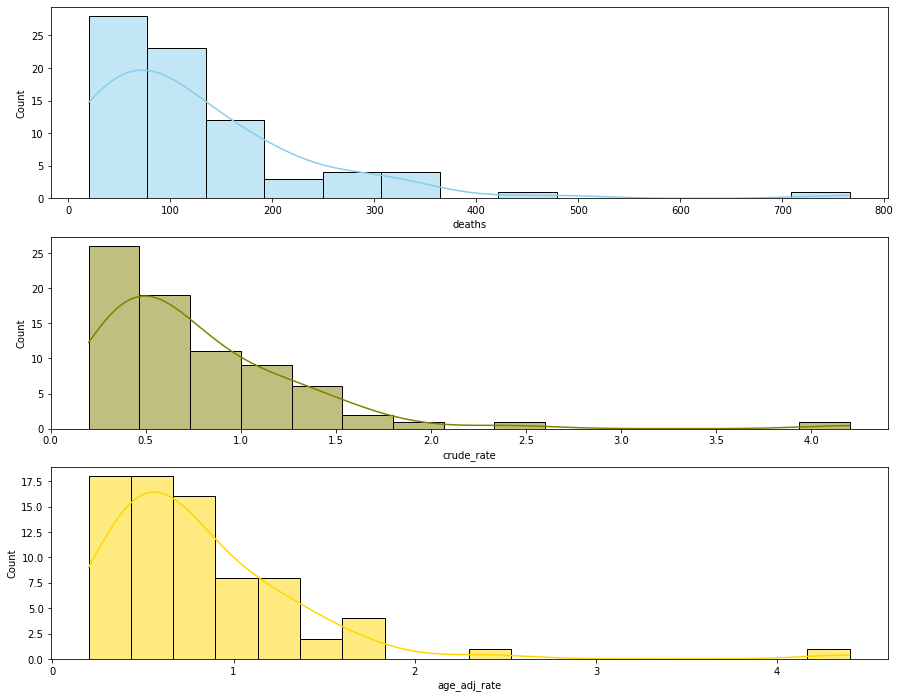

In [ ]:
# Variable: Pregnancy-related death counts, crude death rate and age-adjusted death rate

fig, axs = plt.subplots(3, 1, figsize=(15, 12))

sns.histplot(data=df, x="deaths", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="crude_rate", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="age_adj_rate", kde=True, color="gold", ax=axs[2])

plt.show()

##### On average, most women are either married or have never been married. Nevertheless, a significant portion of the female population is some form of separation (divorced, separated, widowed)

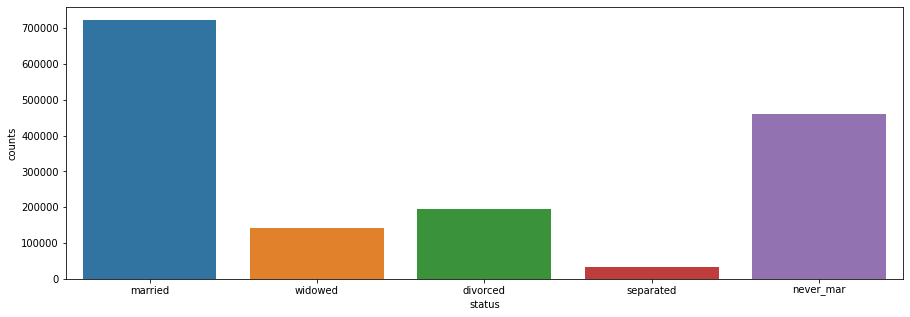

In [ ]:
# Variable: Marital status

mari = df.melt(id_vars=['state','race'],
               value_vars=['married','widowed',
                           'divorced','separated',
                           'never_mar'],
               var_name='status',
               value_name='counts')

plt.figure(figsize=(15,5))
sns.barplot(data=mari, 
            x='status', 
            y='counts', 
            ci=None)
plt.show()

##### The majority of women in the US have at least a high school diploma, but only a third of the female population have attained higher education

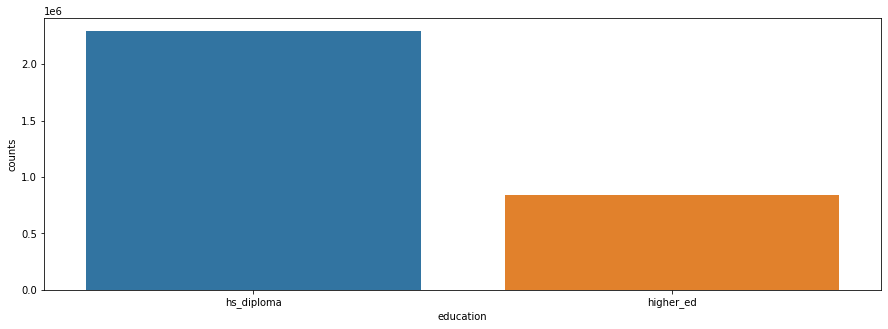

In [ ]:
# Variable: Education

educ = df.melt(id_vars=['state','race'],
               value_vars=['hs_diploma',
                           'higher_ed'],
               var_name='education',
               value_name='counts')

plt.figure(figsize=(15,5))
sns.barplot(data=educ, 
            x='education', 
            y='counts', 
            ci=None)
plt.show()

##### On average, approxiamtely 2/3 of females give birth within marriage, while 1/3 of the female population give birth outside of marriage

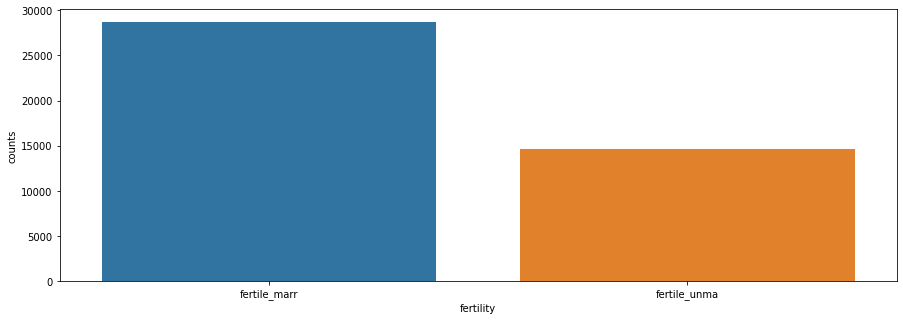

In [ ]:
# Variable: Fertility

fert = df.melt(id_vars=['state','race'],
               value_vars=['fertile_marr', 
                           'fertile_unma'],
               var_name='fertility',
               value_name='counts')

plt.figure(figsize=(15,5))
sns.barplot(data=fert, 
            x='fertility', 
            y='counts', 
            ci=None)
plt.show()

##### Approximately 90%  of the female population is native born, while ~10% foreign-born, and are evenly split between naturalized citizens and immigrants

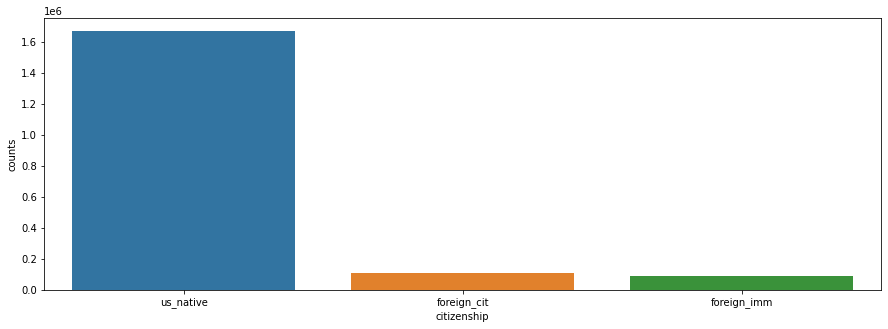

In [ ]:
# Variable: Citizenship

citi = df.melt(id_vars=['state','race'],
               value_vars=['us_native',
                           'foreign_cit', 
                           'foreign_imm',],
               var_name='citizenship',
               value_name='counts')

plt.figure(figsize=(15,5))
sns.barplot(data=citi, 
            x='citizenship', 
            y='counts', 
            ci=None)
plt.show()

##### In general, ~95% of the female population is employed

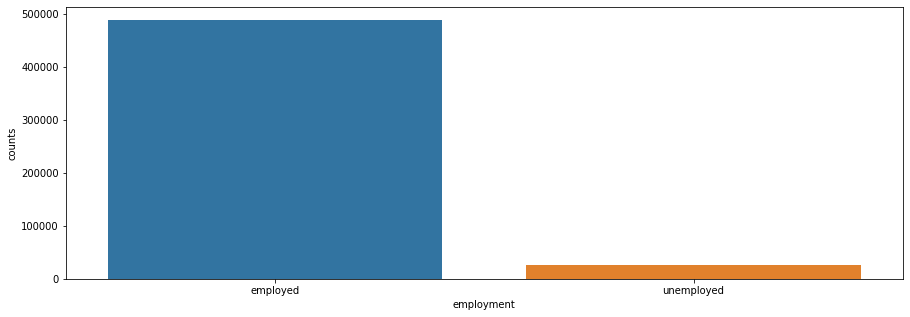

In [ ]:
# Variable: Employment

work = df.melt(id_vars=['state','race'],
               value_vars=['employed', 
                           'unemployed',],
               var_name='employment',
               value_name='counts')

plt.figure(figsize=(15,5))
sns.barplot(data=work, 
            x='employment', 
            y='counts', 
            ci=None)
plt.show()

##### Most women (~60%) in the US are privately insured, only ~10% of women do not have access to healthcare coverage

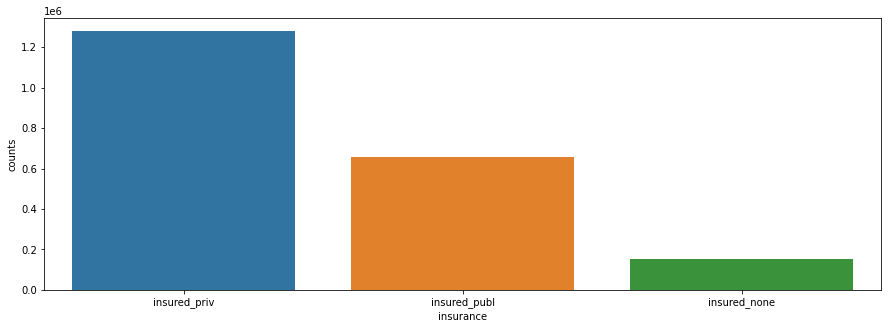

In [ ]:
# Variable: Health insurance

insu = df.melt(id_vars=['state','race'],
               value_vars=['insured_priv', 
                           'insured_publ',
                           'insured_none',],
               var_name='insurance',
               value_name='counts')

plt.figure(figsize=(15,5))
sns.barplot(data=insu, 
            x='insurance', 
            y='counts', 
            ci=None)
plt.show()

##### Single women and single mothers make less income than married women. The poverty rates for unmarried women is also higher than that of married women, regardless of dependents

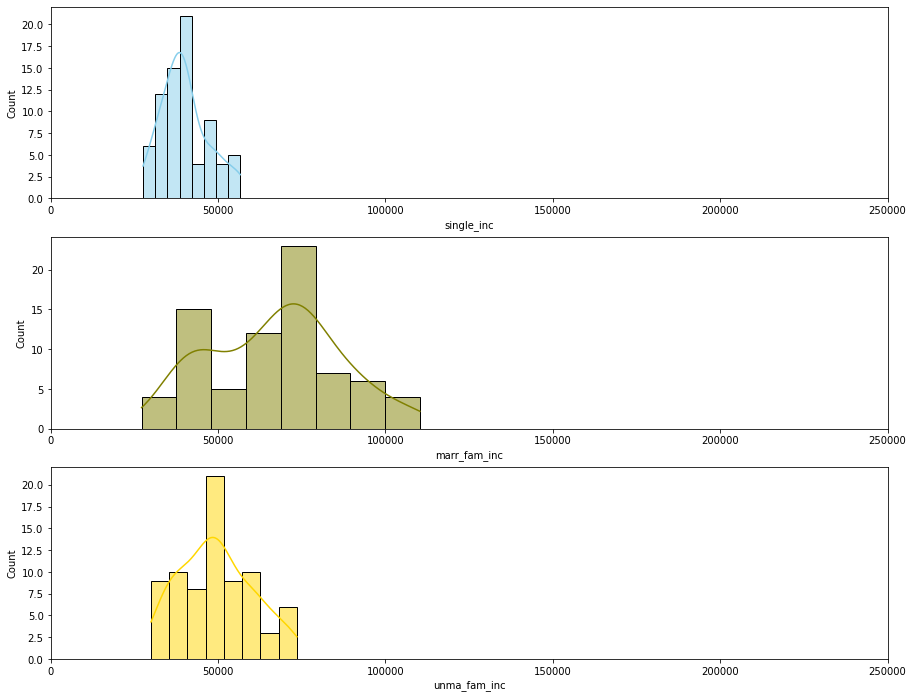

In [ ]:
# Variables: Family income of single, married and unmarried women with kids

fig, axs = plt.subplots(3, 1, figsize=(15, 12))

sns.histplot(data=df, x="single_inc", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="marr_fam_inc", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="unma_fam_inc", kde=True, color="gold", ax=axs[2])

axs[0].set(xlim=(0,250000))
axs[1].set(xlim=(0,250000))
axs[2].set(xlim=(0,250000))

plt.show()

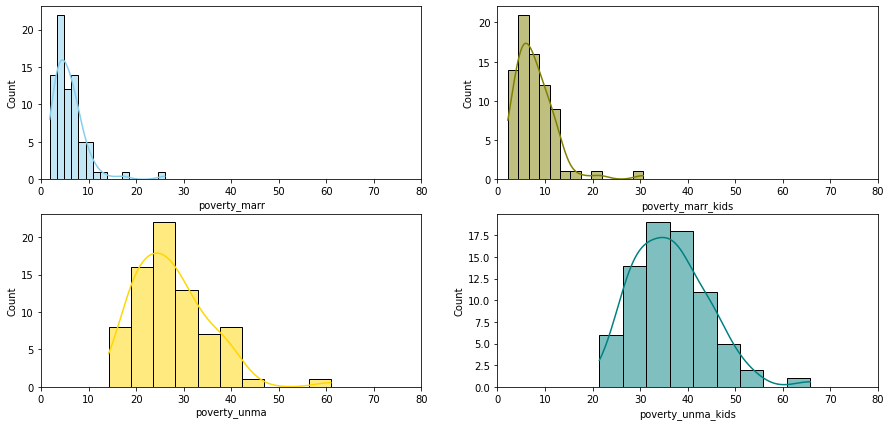

In [ ]:
# Variables: Poverty rate of married and unmarried women, with or without kids

fig, axs = plt.subplots(2, 2, figsize=(15, 7))

sns.histplot(data=df, x="poverty_marr", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="poverty_marr_kids", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="poverty_unma", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="poverty_unma_kids", kde=True, color="teal", ax=axs[1, 1])

axs[0,0].set(xlim=(0,80))
axs[0,1].set(xlim=(0,80))
axs[1,0].set(xlim=(0,80))
axs[1,1].set(xlim=(0,80))

plt.show()

### Bivariate Analysis (Race)

##### American Indian/Alaskan NAtive and Black/African American women die of pregnancy-related causes more frequently than their Asian and White counterparts. Our mortality data on Asian/Pacific Islander and American Indian/Alaskan races may be insufficient to make significant conclusions based on race

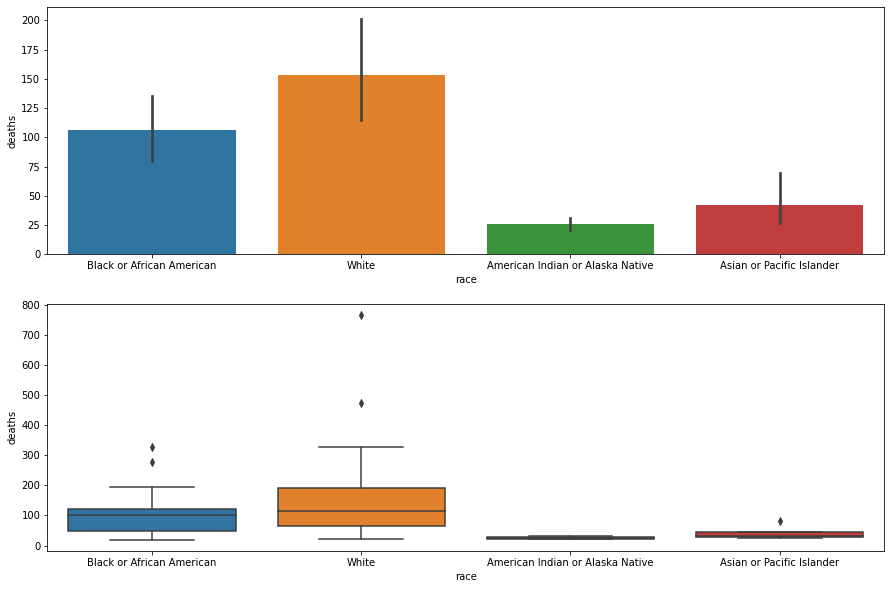

In [ ]:
# Variable: Pregnancy-related deaths

fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.barplot(data=df,
            x='race',
            y='deaths', 
            ax=axs[0])

sns.boxplot(data=df,
            x='race',
            y='deaths', 
            ax=axs[1])

plt.show()

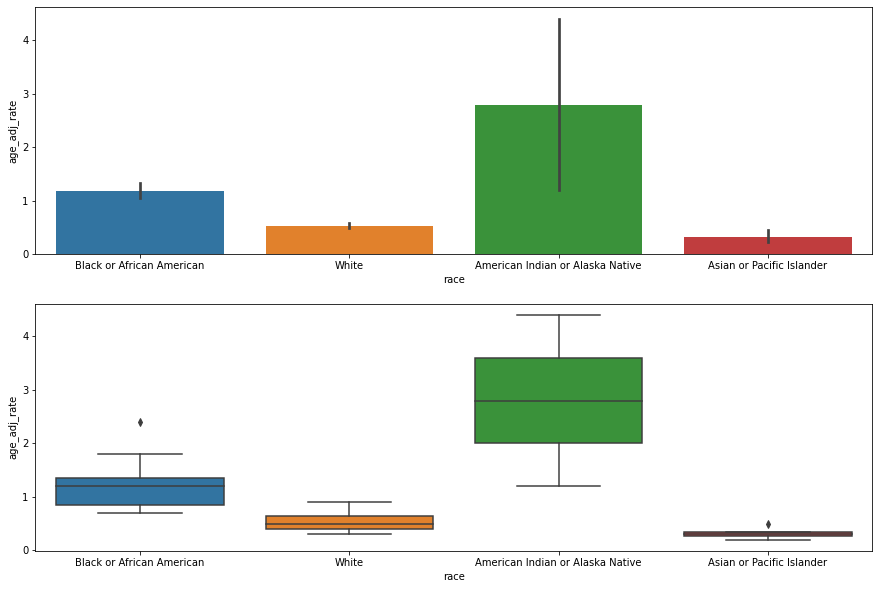

In [ ]:
# Variable: Pregnancy-related age-adjusted death rate

fig, axs = plt.subplots(2, 1, figsize=(15,10))

sns.barplot(data=df,
            x='race',
            y='age_adj_rate', 
            ax=axs[0])

sns.boxplot(data=df,
            x='race',
            y='age_adj_rate', 
            ax=axs[1])


plt.show()

From the mortality data, we can see that we need to account for variable population numbers across the races. Consequently, going forward, we will be calculating percent populations for the selected races

##### On average, Asian women and White women tend to be married, while majority of American Indian and Black women have never been married

In [ ]:
# Variable: Marital status

ms = df[['race','married','widowed','divorced','separated','never_mar']].copy()

ms['population'] = df['married'] + df['widowed'] + df['divorced'] + df['separated'] + df['never_mar'] 

ms['married_per'] = (ms['married']/ms['population'])*100
ms['widowed_per'] = (ms['widowed']/ms['population'])*100
ms['divorced_per'] = (ms['divorced']/ms['population'])*100
ms['separated_per'] = (ms['separated']/ms['population'])*100
ms['never_mar_per'] = (ms['never_mar']/ms['population'])*100

ms.head()

,race,married,widowed,divorced,separated,never_mar,population,married_per,widowed_per,divorced_per,separated_per,never_mar_per
2,Black or African American,146082,52971,78583,25347,262990,565973,25.810772,9.359280,13.884585,4.478482,46.466881
3,White,745617,159696,188400,27845,298651,1420209,52.500512,11.244542,13.265653,1.960627,21.028665
8,American Indian or Alaska Native,36355,9423,12806,3333,62179,124096,29.295868,7.593315,10.319430,2.685824,50.105563
10,Black or African American,35056,6773,18201,3833,55827,119690,29.288997,5.658785,15.206784,3.202440,46.642994
11,White,1092101,204954,330306,39614,612577,2279552,47.908580,8.990977,14.489952,1.737798,26.872693


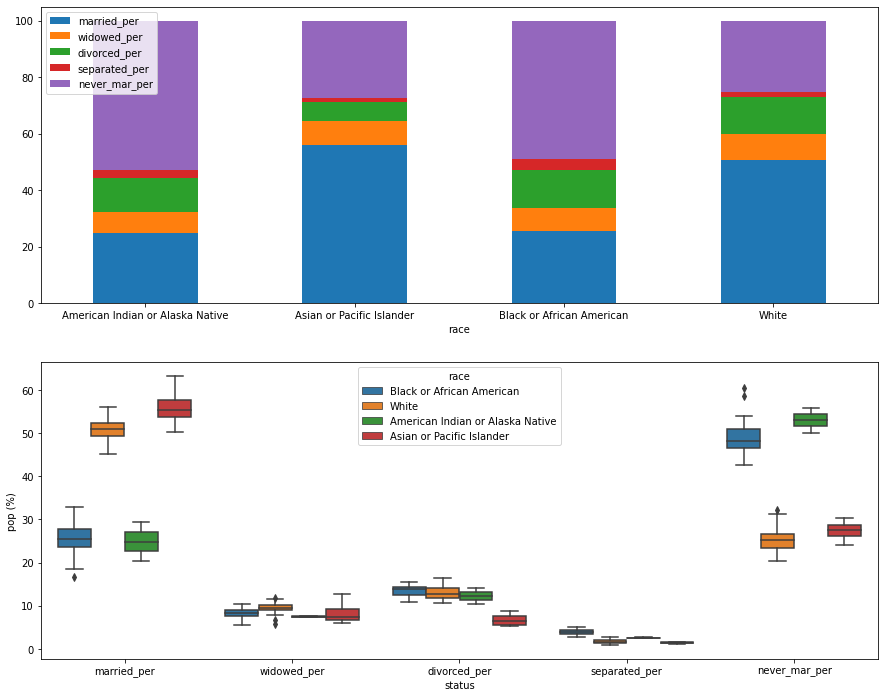

In [ ]:
ms_grp =  ms.groupby('race')[['married_per',
                              'widowed_per',
                              'divorced_per',
                              'separated_per',
                              'never_mar_per']].mean()

ms_melt = ms.melt(id_vars='race',
                  value_vars=['married_per',
                              'widowed_per',
                              'divorced_per',
                              'separated_per',
                              'never_mar_per'],
                  var_name='status',
                  value_name='pop (%)')

fig, axs = plt.subplots(2, 1, figsize=(15,12))

ms_grp.plot(kind='bar',
            stacked=True,
            rot=0,
            ax=axs[0])

sns.boxplot(data=ms_melt, 
            x='status',
            y='pop (%)', 
            hue='race',
            ax=axs[1])
plt.show()

##### Overall, women across all race categories seem to be similarly educated, but Asians lead the charge for higher education, with ~40% of Asian women attaining higher education

In [ ]:
# Variable: Education

ed = df[['race','hs_diploma','higher_ed']].copy()

ed['population'] = ed['hs_diploma'] + ed['higher_ed'] 

ed['hs_diploma_per'] = (ed['hs_diploma']/ed['population'])*100
ed['higher_ed_per'] = (ed['higher_ed']/ed['population'])*100

ed.head()

,race,hs_diploma,higher_ed,population,hs_diploma_per,higher_ed_per
2,Black or African American,709623,170979,880602,80.583851,19.416149
3,White,2077282,647510,2724792,76.236351,23.763649
8,American Indian or Alaska Native,146993,22289,169282,86.833213,13.166787
10,Black or African American,176647,51117,227764,77.557033,22.442967
11,White,3404464,1152408,4556872,74.710547,25.289453


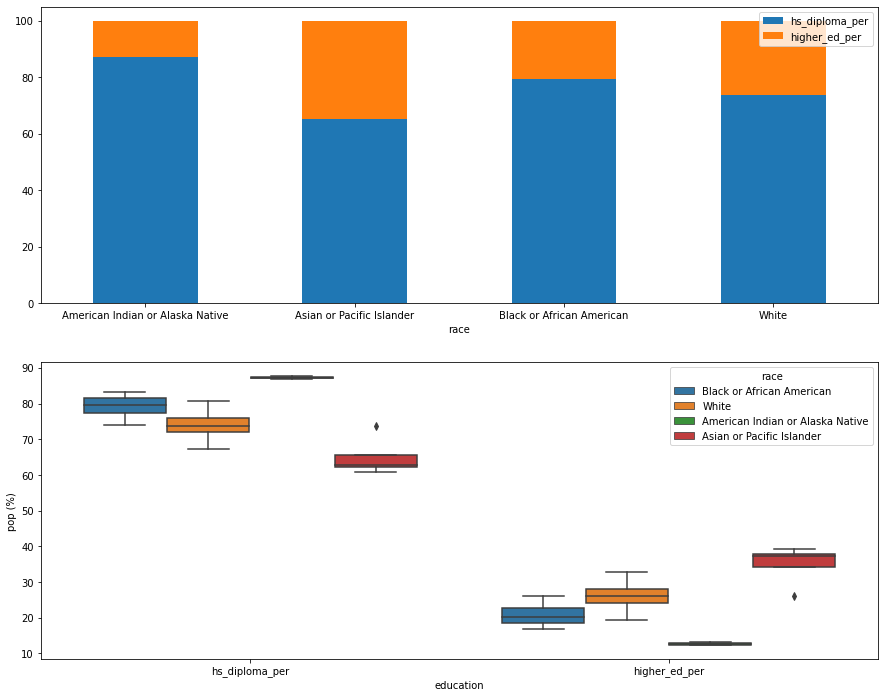

In [ ]:
ed_grp =  ed.groupby('race')[['hs_diploma_per',
                              'higher_ed_per']].mean()

ed_melt = ed.melt(id_vars='race',
                  value_vars=['hs_diploma_per',
                              'higher_ed_per'],
                  var_name='education',
                  value_name='pop (%)')

fig, axs = plt.subplots(2, 1, figsize=(15,12))

ed_grp.plot(kind='bar',
            stacked=True,
            rot=0, 
            ax=axs[0])

sns.boxplot(data=ed_melt, 
            x='education',
            y='pop (%)', 
            hue='race',
            ax=axs[1])
plt.show()

##### Most Asian and White women give birth within marriage (75-85%), while most American Indian and Black women (60%) get in the family way outside of marriage

In [ ]:
# Variable: Fertility

fe = df[['race','fertile_marr','fertile_unma']].copy()

fe['population'] = fe['fertile_marr'] + fe['fertile_unma']

fe['fertile_marr_per'] = (fe['fertile_marr']/fe['population'])*100
fe['fertile_unma_per'] = (fe['fertile_unma']/fe['population'])*100

fe.head()

,race,fertile_marr,fertile_unma,population,fertile_marr_per,fertile_unma_per
2,Black or African American,5364,14404,19768,27.134763,72.865237
3,White,26329,10057,36386,72.360248,27.639752
8,American Indian or Alaska Native,1484,3363,4847,30.616876,69.383124
10,Black or African American,2117,2444,4561,46.415260,53.584740
11,White,41115,21366,62481,65.804004,34.195996


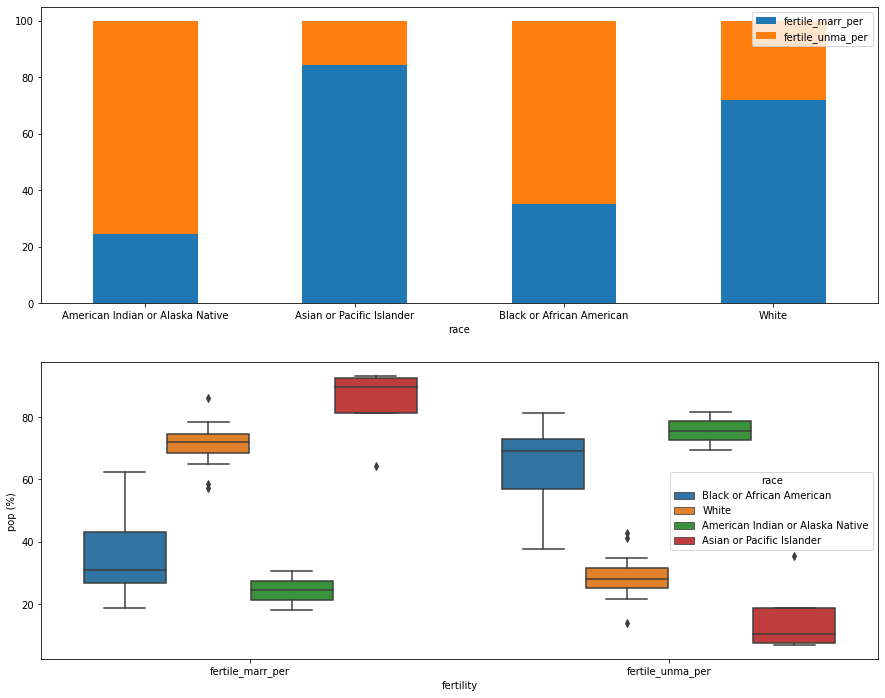

In [ ]:
fe_grp =  fe.groupby('race')[['fertile_marr_per',
                              'fertile_unma_per']].mean()

fe_melt = fe.melt(id_vars='race',
                  value_vars=['fertile_marr_per', 
                              'fertile_unma_per'],
                  var_name='fertility',
                  value_name='pop (%)')

fig, axs = plt.subplots(2, 1, figsize=(15,12))

fe_grp.plot(kind='bar',
            stacked=True,
            rot=0,
            ax=axs[0])

sns.boxplot(data=fe_melt, 
            x='fertility',
            y='pop (%)', 
            hue='race',
            ax=axs[1])
plt.show()

##### Most American Indian, Black and White women in the US are native to the country (~95%), while the Asian female population is somewhat evenly distributed between native citizens, foreign-born citizens and foreign-born immigrants

In [ ]:
# Variable: Citizenship

ci = df[['race','us_native','foreign_cit','foreign_imm']].copy()

ci['population'] = df['us_native'] + df['foreign_cit'] + df['foreign_imm']

ci['us_native_per'] = (ci['us_native']/ci['population'])*100
ci['foreign_cit_per'] = (ci['foreign_cit']/ci['population'])*100
ci['foreign_imm_per'] = (ci['foreign_imm']/ci['population'])*100

ci.head()

,race,us_native,foreign_cit,foreign_imm,population,us_native_per,foreign_cit_per,foreign_imm_per
2,Black or African American,689218,3093,3307,695618,99.079955,0.444641,0.475405
3,White,1657752,15132,20418,1693302,97.900552,0.893639,1.205810
8,American Indian or Alaska Native,160016,1425,1585,163026,98.153669,0.874094,0.972238
10,Black or African American,137551,8739,7737,154027,89.303174,5.673681,5.023145
11,White,2448537,133889,167463,2749889,89.041303,4.868887,6.089809


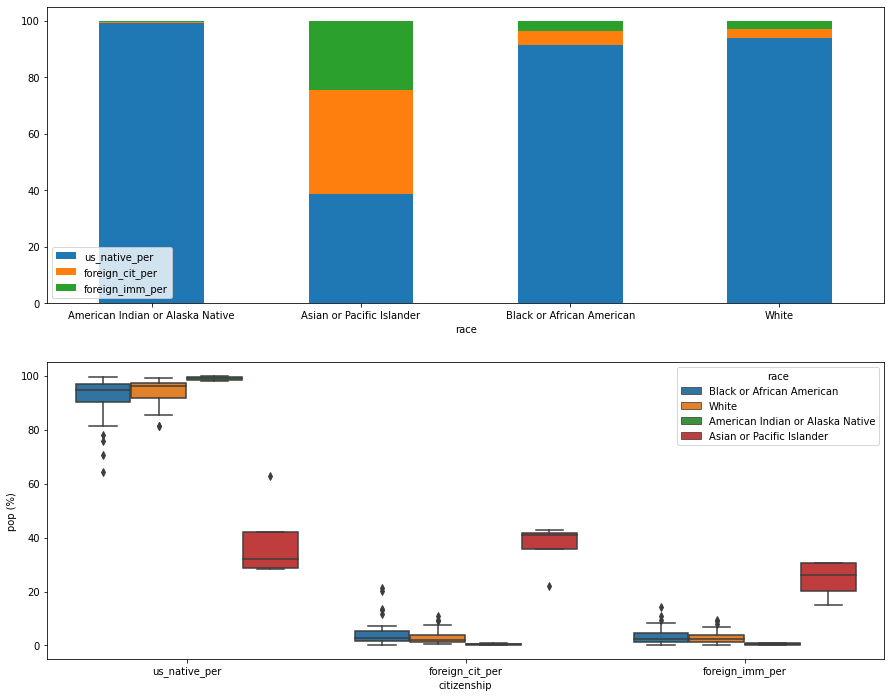

In [ ]:
ci_grp =  ci.groupby('race')[['us_native_per',
                              'foreign_cit_per',
                              'foreign_imm_per']].mean()

ci_melt = ci.melt(id_vars='race',
                 value_vars=['us_native_per',
                             'foreign_cit_per', 
                             'foreign_imm_per'],
                 var_name='citizenship',
                 value_name='pop (%)')

fig, axs = plt.subplots(2, 1, figsize=(15,12))

ci_grp.plot(kind='bar',
            stacked=True,
            rot=0,
            ax=axs[0])

sns.boxplot(data=ci_melt, 
            x='citizenship',
            y='pop (%)', 
            hue='race',
            ax=axs[1])
plt.show()

##### Women are similarly employed across all races, with employement rates > 85%

In [ ]:
# Variable: Employment

em = df[['race','employed','unemployed']].copy()

em['population'] = em['employed'] + em['unemployed']

em['employed_per'] = (em['employed']/em['population'])*100
em['unemployed_per'] = (em['unemployed']/em['population'])*100

em.head()

,race,employed,unemployed,population,employed_per,unemployed_per
2,Black or African American,167061,16471,183532,91.025543,8.974457
3,White,334003,16387,350390,95.323211,4.676789
8,American Indian or Alaska Native,30090,4042,34132,88.157741,11.842259
10,Black or African American,45483,4537,50020,90.929628,9.070372
11,White,607054,33486,640540,94.772223,5.227777


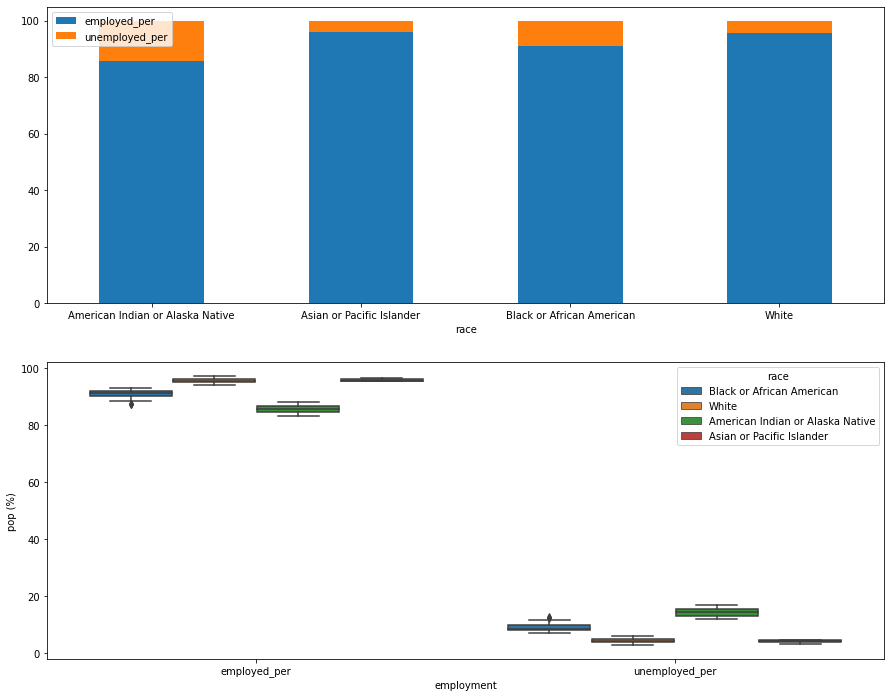

In [ ]:
em_grp =  em.groupby('race')[['employed_per',
                              'unemployed_per']].mean()

em_melt = em.melt(id_vars='race',
                  value_vars=['employed_per', 
                              'unemployed_per'],
                  var_name='employment',
                  value_name='pop (%)')

fig, axs = plt.subplots(2, 1, figsize=(15,12))

em_grp.plot(kind='bar',
            stacked=True,
            rot=0,
            ax=axs[0])

sns.boxplot(data=em_melt, 
            x='employment',
            y='pop (%)', 
            hue='race',
            ax=axs[1])
plt.show()

##### Most Asian and White women are privately insured (~75%), while only 50% of Black women have access to private healthcare insurance. Approximately 10% of Asian, Black and White women are unisured, but over 20% of American Indian women don't have healthcare insurance

In [ ]:
# Variable: Health insurance

hi = df[['race','insured_priv','insured_publ','insured_none']].copy()

hi['population'] = hi['insured_priv'] + hi['insured_publ'] + hi['insured_none']

hi['insured_priv_per'] = (hi['insured_priv']/hi['population'])*100
hi['insured_publ_per'] = (hi['insured_publ']/hi['population'])*100
hi['insured_none_per'] = (hi['insured_none']/hi['population'])*100

hi.head()

,race,insured_priv,insured_publ,insured_none,population,insured_priv_per,insured_publ_per,insured_none_per
2,Black or African American,354857,296495,73927,725279,48.926965,40.880130,10.192905
3,White,1223168,575669,141658,1940495,63.033814,29.666090,7.300096
8,American Indian or Alaska Native,53231,79502,35641,168374,31.614739,47.217504,21.167757
10,Black or African American,90024,65730,14892,170646,52.754826,38.518336,8.726838
11,White,1805027,1083723,258319,3147069,57.355813,34.435947,8.208241


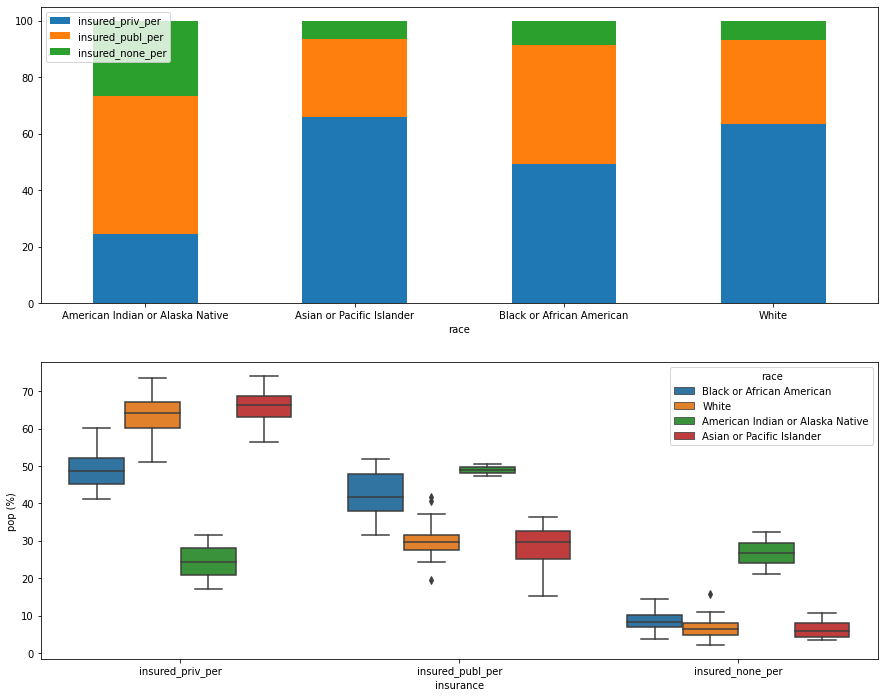

In [ ]:
hi_grp =  hi.groupby('race')[['insured_priv_per',
                              'insured_publ_per',
                              'insured_none_per']].mean()

hi_melt = hi.melt(id_vars='race',
                  value_vars=['insured_priv_per',
                              'insured_publ_per',
                              'insured_none_per'],
                  var_name='insurance',
                  value_name='pop (%)')

fig, axs = plt.subplots(2, 1, figsize=(15,12))

hi_grp.plot(kind='bar',
            stacked=True,
            rot=0,
            ax=axs[0])

sns.boxplot(data=hi_melt, 
            x='insurance',
            y='pop (%)', 
            hue='race',
            ax=axs[1])
plt.show()

##### On average, Black women are low income, regardless of relationship status. White women are distributed in the low income and middle income categories, but women do not make high incomes across all races. There seems to be missing information on Asian and American Indian races, indicating we may have to drop these from our analyses

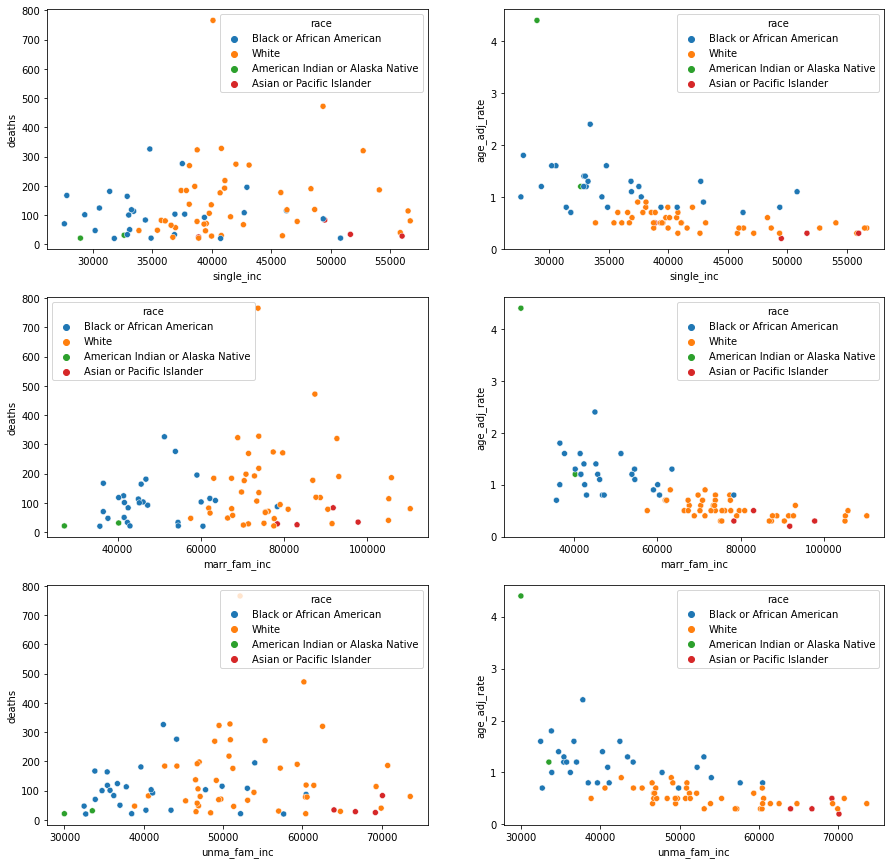

In [ ]:
# Variables: Family income of single, married and unmarried women with kids

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.scatterplot(data=df, x='single_inc', y='deaths', hue='race', ax=axs[0,0])
sns.scatterplot(data=df, x='single_inc', y='age_adj_rate', hue='race', ax=axs[0,1])

sns.scatterplot(data=df, x='marr_fam_inc', y='deaths', hue='race', ax=axs[1,0])
sns.scatterplot(data=df, x='marr_fam_inc', y='age_adj_rate', hue='race', ax=axs[1,1])

sns.scatterplot(data=df, x='unma_fam_inc', y='deaths', hue='race', ax=axs[2,0])
sns.scatterplot(data=df, x='unma_fam_inc', y='age_adj_rate', hue='race', ax=axs[2,1])

plt.show()

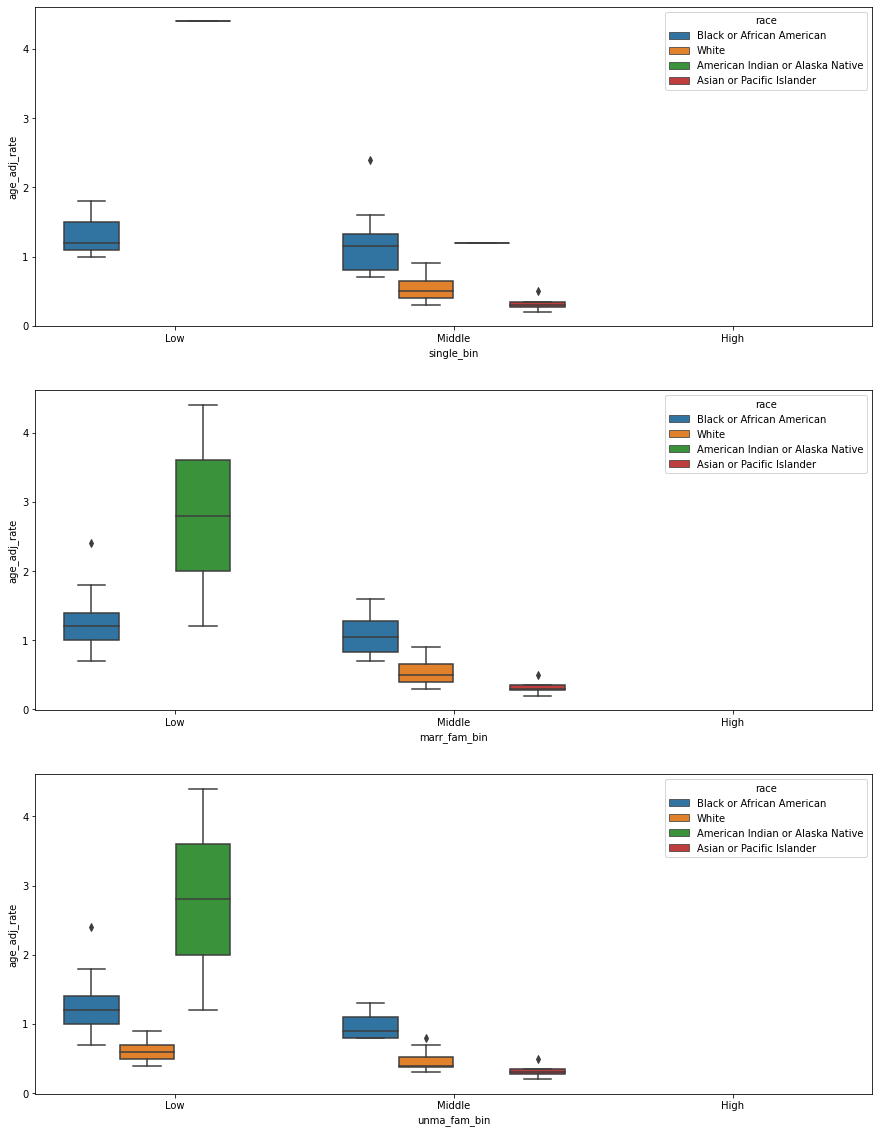

In [ ]:
inc = df[['race','age_adj_rate','single_inc','marr_fam_inc','unma_fam_inc']].copy()

inc['single_bin'] = pd.cut(x=inc['single_inc'], 
                           bins=[0, 30000, 90000, np.inf],
                           labels=['Low','Middle','High'],
                           ordered=False)

inc['marr_fam_bin'] = pd.cut(x=inc['marr_fam_inc'], 
                             bins=[0, 50000, 145000, np.inf],
                             labels=['Low','Middle','High'],
                             ordered=False)

inc['unma_fam_bin'] = pd.cut(x=inc['unma_fam_inc'], 
                             bins=[0, 50000, 145000, np.inf],
                             labels=['Low','Middle','High'],
                             ordered=False)
#inc

fig, axs = plt.subplots(3, 1, figsize=(15,20))

sns.boxplot(data=inc, 
            x='single_bin',
            y='age_adj_rate', 
            hue='race', 
            order=['Low','Middle','High'],
            ax=axs[0])

sns.boxplot(data=inc, 
            x='marr_fam_bin',
            y='age_adj_rate', 
            hue='race', 
            order=['Low','Middle','High'],
            ax=axs[1])

sns.boxplot(data=inc, 
            x='unma_fam_bin',
            y='age_adj_rate', 
            hue='race', 
            order=['Low','Middle','High'],
            ax=axs[2])

plt.show()

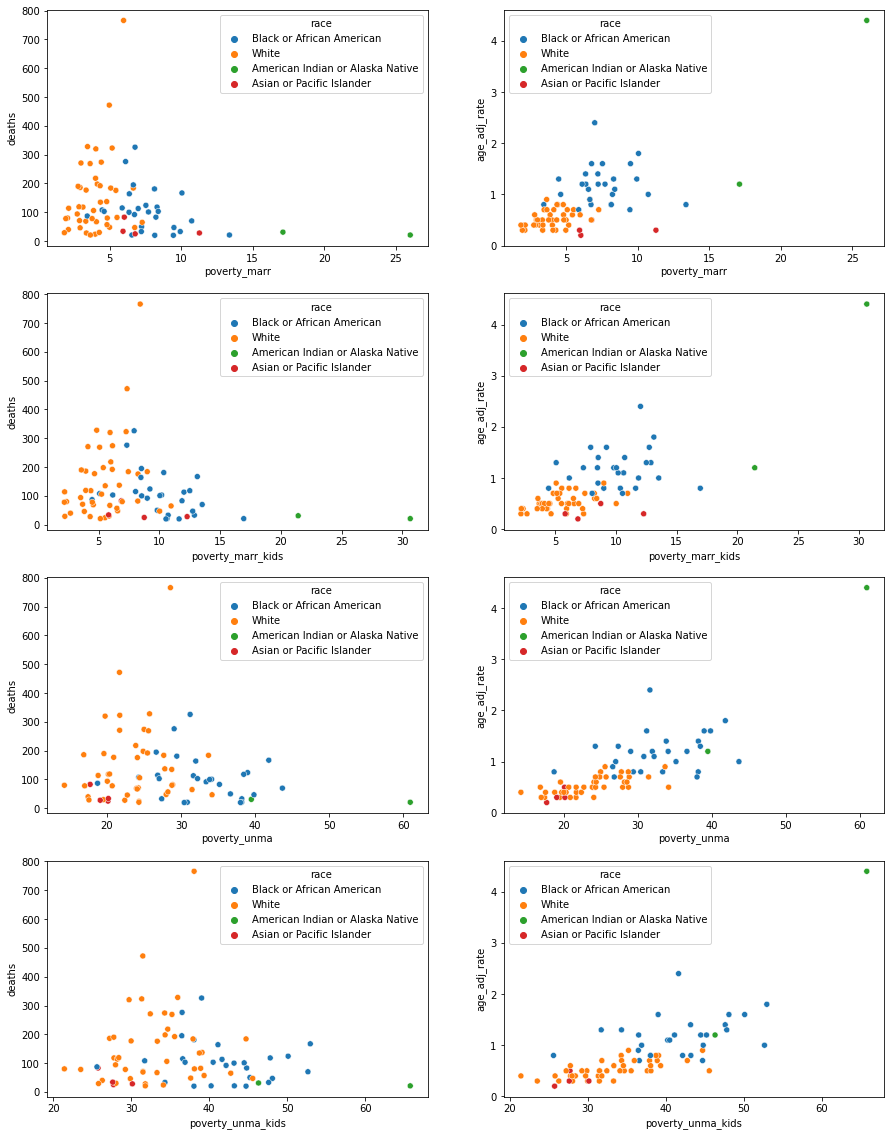

In [ ]:
# Variables: Poverty rate of married and unmarried women, with or without kids

fig, axs = plt.subplots(4, 2, figsize=(15, 20))

sns.scatterplot(data=df, x='poverty_marr', y='deaths', hue='race', ax=axs[0,0])
sns.scatterplot(data=df, x='poverty_marr', y='age_adj_rate', hue='race', ax=axs[0,1])

sns.scatterplot(data=df, x='poverty_marr_kids', y='deaths', hue='race', ax=axs[1,0])
sns.scatterplot(data=df, x='poverty_marr_kids', y='age_adj_rate', hue='race', ax=axs[1,1])

sns.scatterplot(data=df, x='poverty_unma', y='deaths', hue='race', ax=axs[2,0])
sns.scatterplot(data=df, x='poverty_unma', y='age_adj_rate', hue='race', ax=axs[2,1])

sns.scatterplot(data=df, x='poverty_unma_kids', y='deaths', hue='race', ax=axs[3,0])
sns.scatterplot(data=df, x='poverty_unma_kids', y='age_adj_rate', hue='race', ax=axs[3,1])

plt.show()

__Note:__ Since the bivariate analysis on the mortality and socioeconomic factors reveal discrepancies in data availability across the racial categories, we want to see how much data we have by race and state (as we are considering grouping our data even further by location).

##### A high degree of variance was observed in the death rates across the different states, and little to no data was available for Asian and American Indian females in most states. 

Conseqently, moving forward, we will likely have to draw the line at comparing only Black and White female populations in the US.

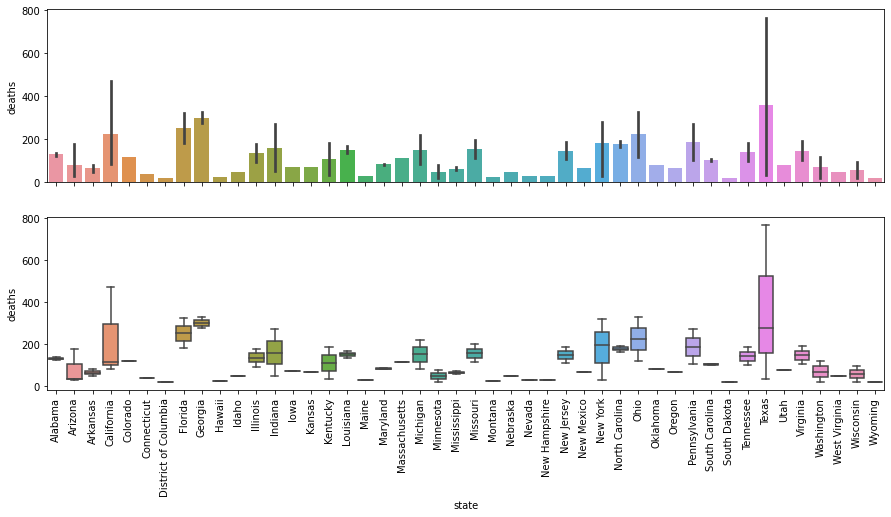

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,7))
sns.barplot(data=df,
            x='state',
            y='deaths',
            ax=axs[0])

sns.boxplot(data=df,
            x='state',
            y='deaths',
            ax=axs[1])

axs[0].set(xlabel=None, xticklabels=[])
axs[1].tick_params(axis='x', rotation=90)

plt.show()

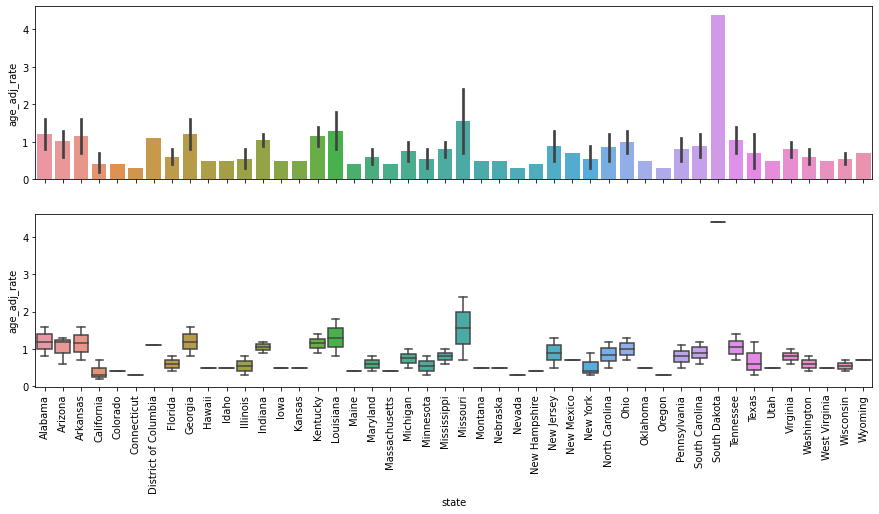

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,7))
sns.barplot(data=df,
            x='state',
            y='age_adj_rate',
            ax=axs[0])

sns.boxplot(data=df,
            x='state',
            y='age_adj_rate',
            ax=axs[1])

axs[0].set(xlabel=None, xticklabels=[])
axs[1].tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
# Checking mortality data availabilty by state and race

sr = df[['state','race','age_adj_rate']].copy()

sr.head()

,state,race,age_adj_rate
2,Alabama,Black or African American,1.6
3,Alabama,White,0.8
8,Arizona,American Indian or Alaska Native,1.2
10,Arizona,Black or African American,1.3
11,Arizona,White,0.6


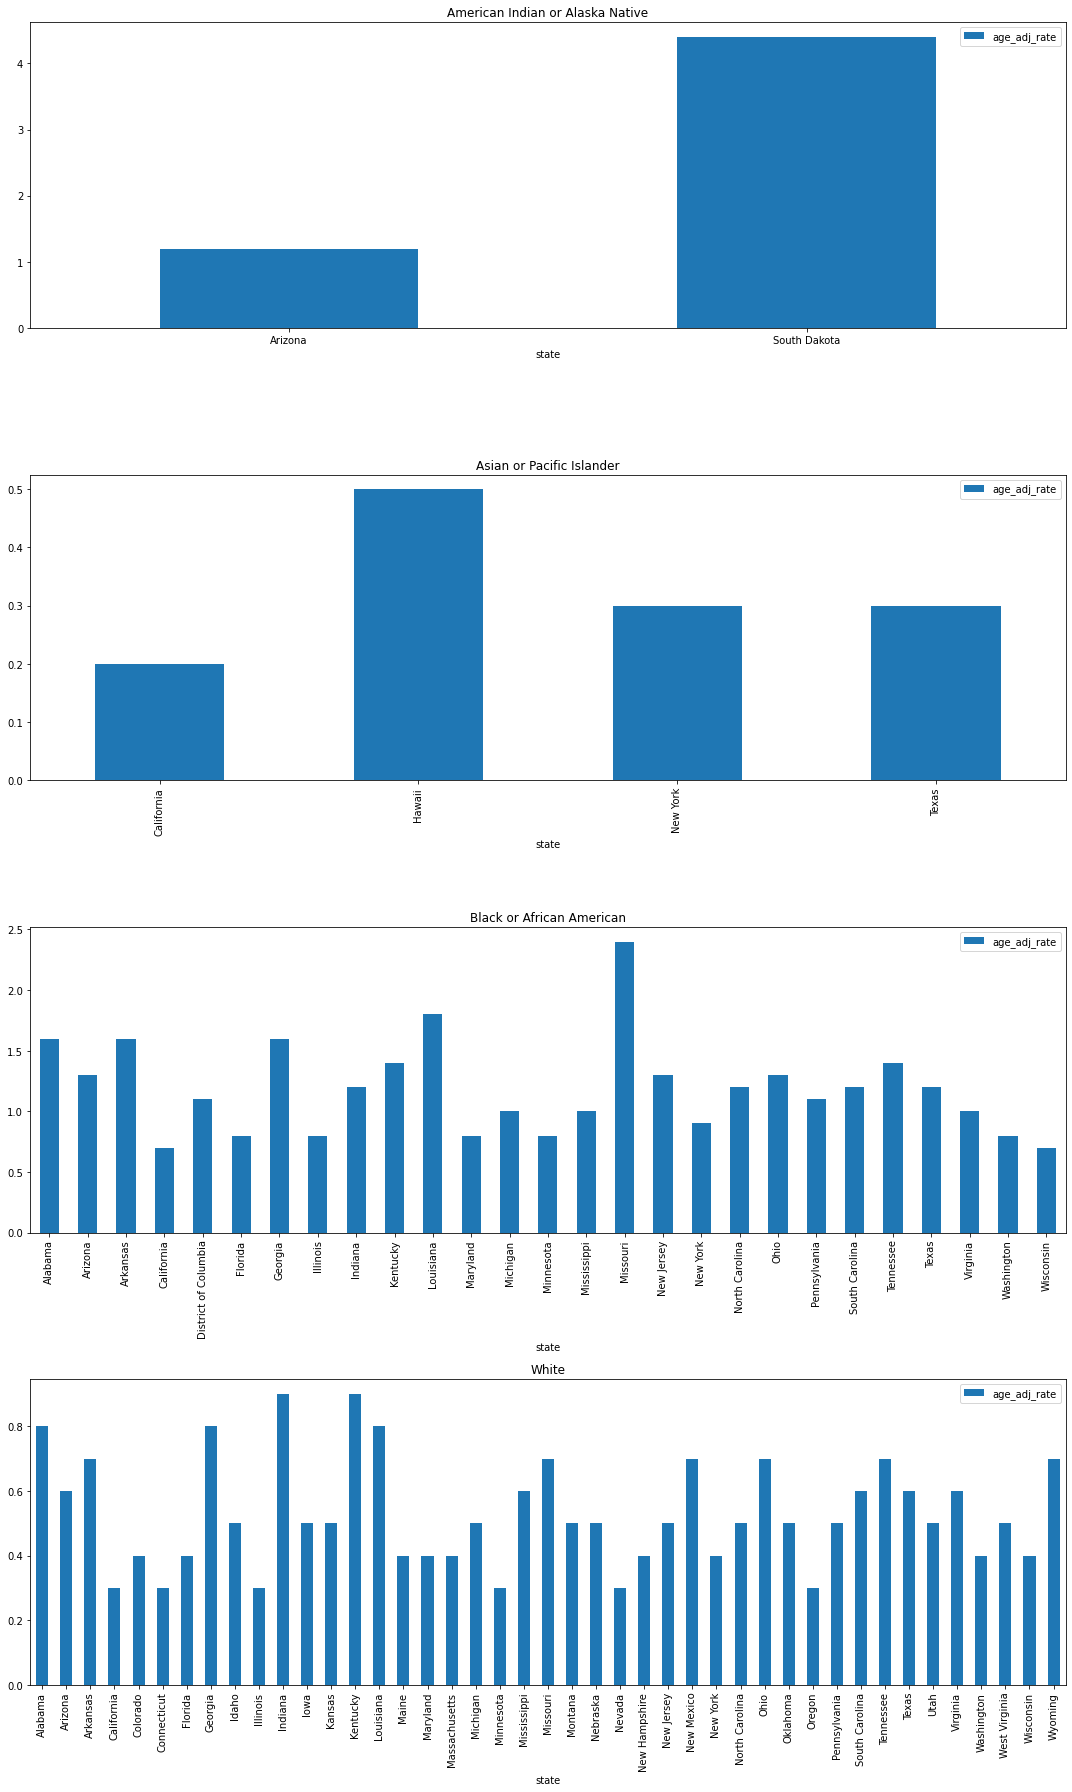

In [ ]:
r1 = sr[sr['race']=='American Indian or Alaska Native']
r2 = sr[sr['race']=='Asian or Pacific Islander']
r3 = sr[sr['race']=='Black or African American']
r4 = sr[sr['race']=='White']

fig, axs = plt.subplots(4, 1, figsize=(15,25))
r1.plot(kind='bar', stacked=True,
        x='state', rot=0, ax=axs[0], 
        title='American Indian or Alaska Native')

r2.plot(kind='bar', stacked=True,
      x='state', rot=90, ax=axs[1], 
        title='Asian or Pacific Islander')

r3.plot(kind='bar', stacked=True,
        x='state', rot=90, ax=axs[2], 
        title='Black or African American')

r4.plot(kind='bar', stacked=True,
      x='state', rot=90, ax=axs[3], 
        title='White')

plt.tight_layout()
plt.show()

### Correlation

In [ ]:
df1 = df.copy()

ms_pop = df1['married'] + df1['widowed'] + df1['divorced'] + df1['separated'] + df1['never_mar'] 
ed_pop = df1['hs_diploma'] + df1['higher_ed'] 
fe_pop = df1['fertile_marr'] + df1['fertile_unma']
ci_pop = df1['us_native'] + df1['foreign_cit'] + df1['foreign_imm']
em_pop = df1['employed'] + df1['unemployed']
hi_pop = df1['insured_priv'] + df1['insured_publ'] + df1['insured_none']

df1['married_per'] = (df1['married']/ms_pop)*100
df1['widowed_per'] = (df1['widowed']/ms_pop)*100
df1['divorced_per'] = (df1['divorced']/ms_pop)*100
df1['separated_per'] = (df1['separated']/ms_pop)*100
df1['never_mar_per'] = (df1['never_mar']/ms_pop)*100
df1['hs_diploma_per'] = (df1['hs_diploma']/ed_pop)*100
df1['higher_ed_per'] = (df1['higher_ed']/ed_pop)*100
df1['fertile_marr_per'] = (df1['fertile_marr']/fe_pop)*100
df1['fertile_unma_per'] = (df1['fertile_unma']/fe_pop)*100
df1['us_native_per'] = (df1['us_native']/ci_pop)*100
df1['foreign_cit_per'] = (df1['foreign_cit']/ci_pop)*100
df1['foreign_imm_per'] = (df1['foreign_imm']/ci_pop)*100
df1['employed_per'] = (df1['employed']/em_pop)*100
df1['unemployed_per'] = (df1['unemployed']/em_pop)*100
df1['insured_priv_per'] = (df1['insured_priv']/hi_pop)*100
df1['insured_publ_per'] = (df1['insured_publ']/hi_pop)*100
df1['insured_none_per'] = (df1['insured_none']/hi_pop)*100

df1.drop(['deaths','crude_rate',
          'married','widowed','divorced','separated','never_mar',
          'hs_diploma','higher_ed',
          'fertile_marr','fertile_unma',
          'us_native','foreign_cit','foreign_imm',
          'employed','unemployed',
          'insured_priv','insured_publ','insured_none'],
         axis=1, 
         inplace=True)
df1

,state,race,age_adj_rate,single_inc,marr_fam_inc,unma_fam_inc,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids,married_per,widowed_per,divorced_per,separated_per,never_mar_per,hs_diploma_per,higher_ed_per,fertile_marr_per,fertile_unma_per,us_native_per,foreign_cit_per,foreign_imm_per,employed_per,unemployed_per,insured_priv_per,insured_publ_per,insured_none_per
2,Alabama,Black or African American,1.6,30560.0,41421.2,36678.0,7.54,9.22,38.98,50.12,25.810772,9.359280,13.884585,4.478482,46.466881,80.583851,19.416149,27.134763,72.865237,99.079955,0.444641,0.475405,91.025543,8.974457,48.926965,40.880130,10.192905
3,Alabama,White,0.8,38105.4,69768.2,46528.8,4.80,6.70,27.80,39.08,52.500512,11.244542,13.265653,1.960627,21.028665,76.236351,23.763649,72.360248,27.639752,97.900552,0.893639,1.205810,95.323211,4.676789,63.033814,29.666090,7.300096
8,Arizona,American Indian or Alaska Native,1.2,32635.8,40233.4,33519.0,17.12,21.42,39.48,46.32,29.295868,7.593315,10.319430,2.685824,50.105563,86.833213,13.166787,30.616876,69.383124,98.153669,0.874094,0.972238,88.157741,11.842259,31.614739,47.217504,21.167757
10,Arizona,Black or African American,1.3,36865.8,54500.8,43435.4,9.94,12.88,27.38,34.32,29.288997,5.658785,15.206784,3.202440,46.642994,77.557033,22.442967,46.415260,53.584740,89.303174,5.673681,5.023145,90.929628,9.070372,52.754826,38.518336,8.726838
11,Arizona,White,0.6,40699.6,70414.4,51233.0,5.44,8.24,24.10,33.34,47.908580,8.990977,14.489952,1.737798,26.872693,74.710547,25.289453,65.804004,34.195996,89.041303,4.868887,6.089809,94.772223,5.227777,57.355813,34.435947,8.208241
14,Arkansas,Black or African American,1.6,30200.4,37659.2,32482.8,9.50,12.74,39.84,48.10,25.853864,9.347126,14.377994,4.649639,45.771377,82.178330,17.821670,27.251732,72.748268,99.114902,0.332477,0.552620,91.909897,8.090103,43.168856,49.245415,7.585728
15,Arkansas,White,0.7,35755.6,61881.0,40588.2,5.52,8.22,28.86,38.90,51.576904,11.221111,14.580279,2.159686,20.462020,78.099642,21.900358,68.235838,31.764162,97.298036,0.940052,1.761912,95.824470,4.175530,56.418412,36.816993,6.764595
17,California,Asian or Pacific Islander,0.2,49491.5,91802.5,70080.1,6.03,6.87,17.72,25.74,54.971625,8.194360,7.181340,1.478157,28.174518,62.984162,37.015838,86.954499,13.045501,35.050889,42.974364,21.974748,95.521146,4.478854,67.075409,28.299280,4.625311
18,California,Black or African American,0.7,46278.0,62160.0,49872.0,5.88,8.04,26.84,36.60,24.905383,8.281020,14.480836,3.520539,48.812222,77.046083,22.953917,42.279581,57.720419,92.198898,4.873245,2.927856,90.339888,9.660112,52.611002,42.076877,5.312121
19,California,White,0.3,49348.8,87402.0,60181.6,4.98,7.34,21.68,31.48,46.128377,8.361502,12.322358,2.240826,30.946936,71.572617,28.427383,69.695701,30.304299,81.304178,9.365602,9.330219,94.235010,5.764990,59.035899,34.646113,6.317987


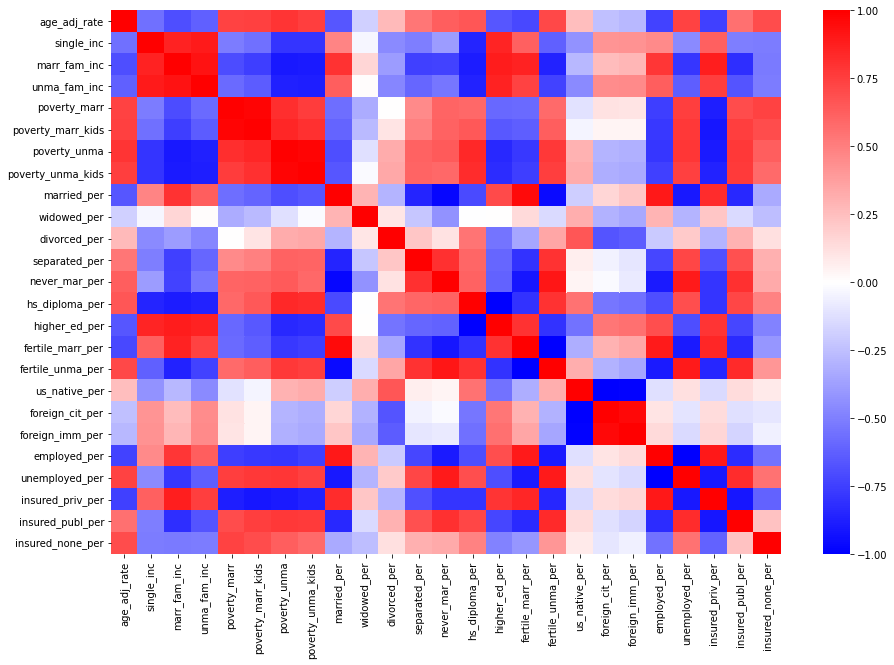

In [ ]:
# calculating the correlation matrix

corr = df1.corr()

# plotting the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='bwr');

In [ ]:
# correlation of variables to the age-adjusted mortality rate grouped by race

corr2 = df1.groupby('race').corr()['age_adj_rate'].to_frame().reset_index()
corr2

,race,level_1,age_adj_rate
0,American Indian or Alaska Native,age_adj_rate,1.000000
1,American Indian or Alaska Native,single_inc,-1.000000
2,American Indian or Alaska Native,marr_fam_inc,-1.000000
3,American Indian or Alaska Native,unma_fam_inc,-1.000000
4,American Indian or Alaska Native,poverty_marr,1.000000
5,American Indian or Alaska Native,poverty_marr_kids,1.000000
6,American Indian or Alaska Native,poverty_unma,1.000000
7,American Indian or Alaska Native,poverty_unma_kids,1.000000
8,American Indian or Alaska Native,married_per,-1.000000
9,American Indian or Alaska Native,widowed_per,-1.000000


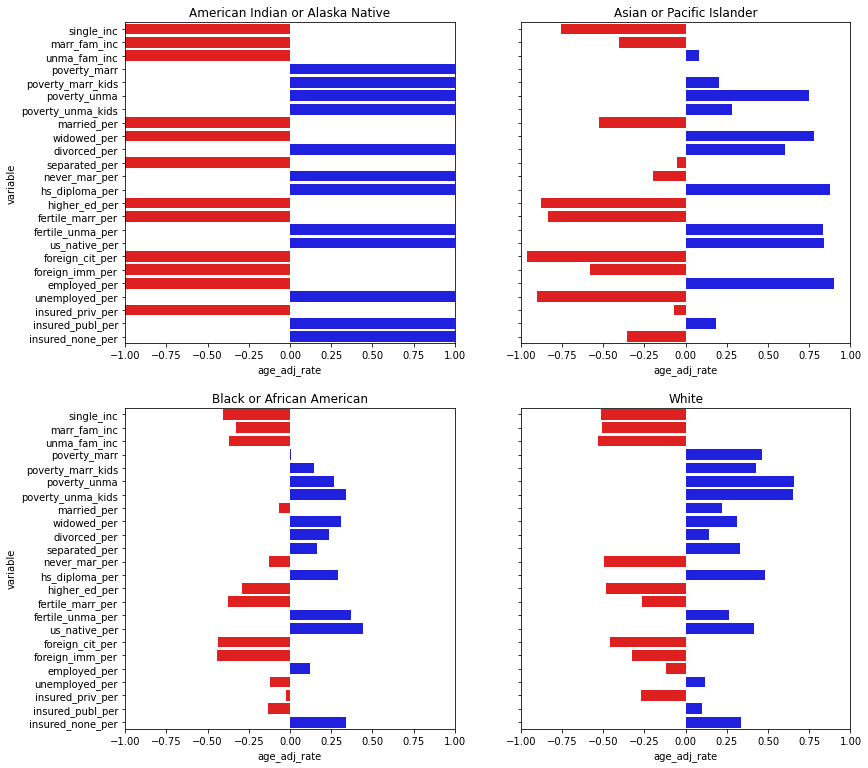

In [ ]:
r1 = corr2[corr2['race']== 'American Indian or Alaska Native']
r2 = corr2[corr2['race']== 'Asian or Pacific Islander']
r3 = corr2[corr2['race']== 'Black or African American']
r4 = corr2[corr2['race']== 'White']

fig, axs = plt.subplots(2, 2, figsize=(13,13))

sns.barplot(data=r1,x=r1['age_adj_rate'][1:],y=r1['level_1'][1:],ax=axs[0,0],
            palette=r1['age_adj_rate'][1:].apply(lambda x: 'b' if x>0 else 'r'),
            orient='h')

sns.barplot(data=r2,x=r2['age_adj_rate'][1:],y=r2['level_1'][1:],ax=axs[0,1],
            palette=r2['age_adj_rate'][1:].apply(lambda x: 'b' if x>0 else 'r'),
            orient='h')

sns.barplot(data=r3,x=r3['age_adj_rate'][1:],y=r3['level_1'][1:],ax=axs[1,0],
            palette=r3['age_adj_rate'][1:].apply(lambda x: 'b' if x>0 else 'r'),
            orient='h')

sns.barplot(data=r4,x=r4['age_adj_rate'][1:],y=r4['level_1'][1:],ax=axs[1,1],
            palette=r4['age_adj_rate'][1:].apply(lambda x: 'b' if x>0 else 'r'),
            orient='h')

axs[0,0].set(xlim=(-1, 1), ylabel='variable', 
             title='American Indian or Alaska Native')

axs[0,1].set(xlim=(-1, 1), ylabel=None, 
             yticklabels=[], title='Asian or Pacific Islander')

axs[1,0].set(xlim=(-1, 1), ylabel='variable', 
             title='Black or African American')

axs[1,1].set(xlim=(-1, 1), ylabel=None, 
             yticklabels=[], title='White')

plt.show()

## Conclusions

This notebook was used to conduct exploratory data analysis on mortality and socioeconomic data for select female populations in the US. In general, differences could be observed in the pregnancy-related death rate, marital status, access to health care and income of Black and White female populations. On the other hand, missing information for the American Indian and Asian populations make comparison against these categories infeasible. Therefore, moving forward, we will only consider the Black and White populations for our analysis.